In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
import random

C:\Users\MY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
df=pd.read_csv('final_data.csv')

In [4]:
# df=df.sample(500)
df=df[:500]

In [5]:
df.shape

(500, 6)

In [6]:
df.head()

,Date,compound,neg,neu,pos,Close
0,3-Jan-11,-0.8934,0.172,0.746,0.082,119.49
1,4-Jan-11,-0.6996,0.133,0.806,0.060,121.87
2,5-Jan-11,-0.9442,0.319,0.638,0.044,124.93
3,6-Jan-11,-0.7906,0.179,0.726,0.094,124.98
4,7-Jan-11,-0.5859,0.140,0.766,0.094,124.99


In [7]:
X=df[['compound','neg','neu','pos']]
# X=df[['neg','neu','pos']]
# Y=df[['Close']]/400     #normalize it
Y=df[['Close']]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [9]:
from sklearn import preprocessing
min_max_scalar=preprocessing.MinMaxScaler()
X_train=min_max_scalar.fit_transform(X_train)
X_test=min_max_scalar.fit_transform(X_test)
Y_train=min_max_scalar.fit_transform(Y_train)
Y_test=min_max_scalar.fit_transform(Y_test)

In [10]:
#denormalize the data
# ttt=min_max_scalar.inverse_transform(Y_test)

In [11]:
# from sklearn.preprocessing import StandardScaler
# scalar=StandardScaler()
# scalar.fit(X_train)
# X_train=scalar.transform(X_train)
# X_test=scalar.transform(X_test)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import activations

C:\Users\MY\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
model=Sequential()

In [14]:
model.add(Dense(4,activation=activations.sigmoid,input_shape=(4,)))
# model.add(Dense(3,activation='relu',input_shape=(3,)))
model.add(Dense(3,activation=activations.sigmoid))
model.add(Dense(2,activation=activations.sigmoid))
# model.add(Dense(100,activation=activations.sigmoid))
# model.add(Dense(100,activation=activations.sigmoid))
# model.add(Dense(100,activation=activations.sigmoid))
# model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(1,activation=activations.sigmoid))

In [15]:
model.compile(optimizer='adam',loss=losses.mean_absolute_error)

In [16]:
# while 1:
#     model.fit(X_train,Y_train,epochs=500)
#     y_pred=model.predict(X_test)
#     falto=r2_score(Y_test,y_pred)
#     print(falto)
#     if falto >= 70.0:
#         break

In [ ]:
# model.fit(X_train,Y_train,verbose=2,epochs=1000000)
model.fit(X_train,Y_train,verbose=2,epochs=1000000)
# model.fit(X_train,Y_train,verbose=2)

In [18]:
y_pred=model.predict(X_test)

In [19]:
y_train_pred=model.predict(X_train)

In [20]:
# Y_test

In [21]:
# y_pred

In [22]:
model.evaluate(X_train,Y_train)

400/400 [==============================] - 0s 270us/step


0.14304457664489745

In [23]:
model.evaluate(X_test,Y_test)

100/100 [==============================] - 0s 110us/step


0.302719304561615

In [50]:
model.evaluate(X_test,y_pred)

100/100 [==============================] - 1s 7ms/step


0.0

In [25]:
print(r2_score(Y_test,y_pred))

-1.5835370747744837


In [26]:
print(r2_score(Y_train,y_train_pred))

0.21388633002278068


In [27]:
print(r2_score(Y_train.tolist()+Y_test.tolist(),y_train_pred.tolist()+y_pred.tolist()))

-0.17776372767559856


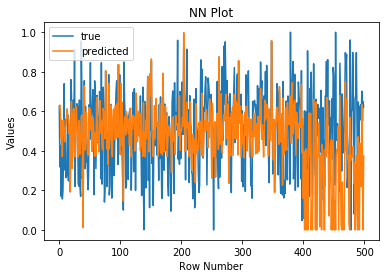

In [49]:
import matplotlib.pyplot as plt

# df1=pd.read_csv('NN-DATA-all.csv',usecols=['Y'])

# df2=pd.read_csv('NN-DATA-all.csv',usecols=['Y-ENN'])

# df3=pd.read_csv('NN-DATA-all.csv',usecols=['Y-ANN'])

# data1 = df1.values.tolist()
# data2 = df2.values.tolist()
# data3 = df3.values.tolist()


# plt.plot(range(705),data1, label='Y')
plt.plot(range(500),Y_train.tolist()+Y_test.tolist(), label='true')
plt.plot(range(500),y_train_pred.tolist()+y_pred.tolist(), label='predicted')

plt.xlabel('Row Number')
plt.ylabel('Values')

plt.title("NN Plot")

plt.legend()

plt.show()

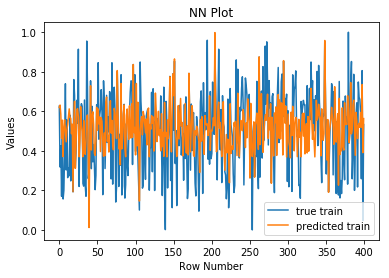

In [29]:
plt.plot(range(len(Y_train)),Y_train, label='true train')
plt.plot(range(len(y_train_pred)),y_train_pred, label='predicted train')

plt.xlabel('Row Number')
plt.ylabel('Values')

plt.title("NN Plot")

plt.legend()

plt.show()

In [30]:
pd.DataFrame(model.predict(X)).to_csv('ansr_y_pred.csv')

In [31]:
# y_pred

In [32]:
# Y_test

In [33]:
model.layers[0].get_weights()

[array([[ -0.6457795,  23.522747 , 514.71234  , -16.444277 ],
        [ -8.209    , -24.78769  ,   4.1482778,   2.3516786],
        [  2.161397 ,  -4.6944513,  -9.700346 ,   2.163616 ],
        [  6.335874 ,  24.334064 ,  -3.4370735,   1.8428339]],
       dtype=float32),
 array([-0.76070935, -5.512969  ,  1.4867955 , -1.292671  ], dtype=float32)]

In [34]:
model.layers[1].get_weights()

[array([[ -10.412538 ,   -3.9354084,  -12.357957 ],
        [   3.831906 , -111.5212   ,   -5.978113 ],
        [   5.5130134,    6.8293753,    9.008686 ],
        [ -24.352896 ,   -3.9376512,   -4.3479047]], dtype=float32),
 array([ 2.145301 , -2.8935804,  0.9390881], dtype=float32)]

In [35]:
model.layers[2].get_weights()

[array([[-15.694256 ,  -9.80161  ],
        [-16.251238 ,  -6.640927 ],
        [ 20.562572 ,  -0.7510845]], dtype=float32),
 array([-3.8320396,  7.4567604], dtype=float32)]

In [36]:
model.layers[3].get_weights()

[array([[  8.980412],
        [-10.745937]], dtype=float32), array([1.2212396], dtype=float32)]

In [37]:
# model.save_weights("model.h5")

In [38]:
model_json = model.to_json()

In [39]:
model_json

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 4], "dtype": "float32", "units": 4, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 3, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null

In [40]:
from keras.models import load_model

In [41]:
# model.load_weights('model_full.h5')

In [42]:
# model.layers[3].get_weights()

In [43]:
# y_pred=model.predict(X_test)

In [44]:
# print(r2_score(Y_test,y_pred))

In [45]:
model.save('model_full.h5')

In [46]:
# model=load_model('model_full.h5')

In [47]:
pd.DataFrame(model.predict(X_train)).to_csv('ansr_y_train_pred.csv')

In [48]:
pd.DataFrame(model.predict(X_test)).to_csv('ansr_y_test_pred.csv')